In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\Rana Pratap\OneDrive\Desktop\diabetes.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df_copy = df.copy(deep=True)

In [10]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [11]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [12]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

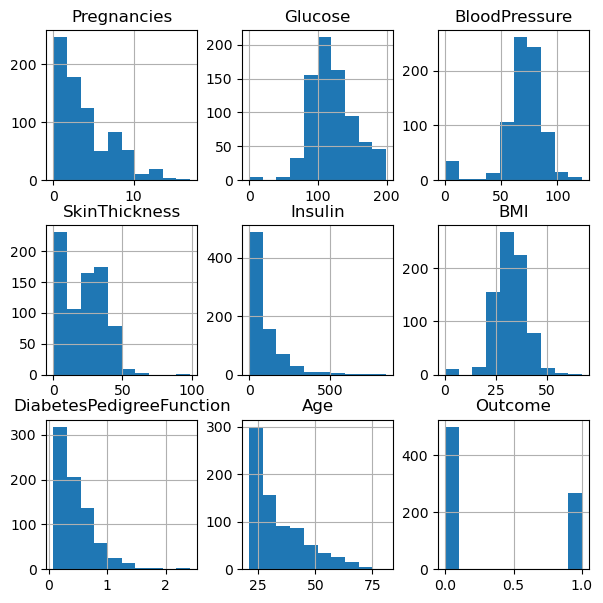

In [13]:
p= df.hist(figsize=(7,7))

In [14]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

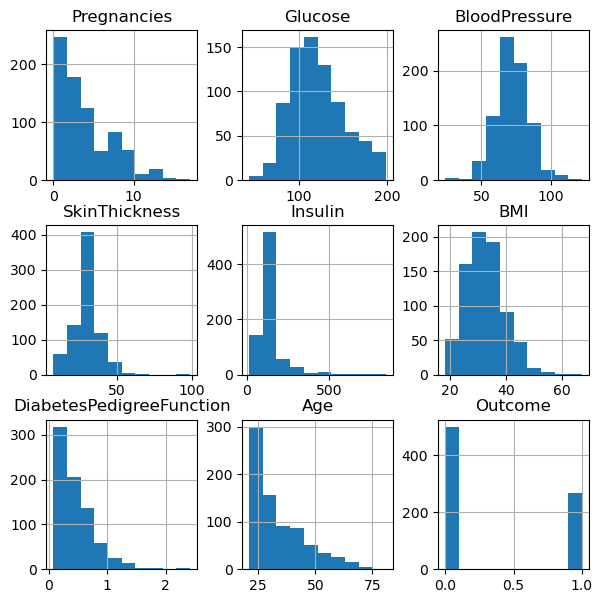

In [15]:
p=df_copy.hist(figsize=(7,7))

C:\Users\Rana Pratap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:>, <seaborn.axisgrid.FacetGrid at 0x144ecda8430>)

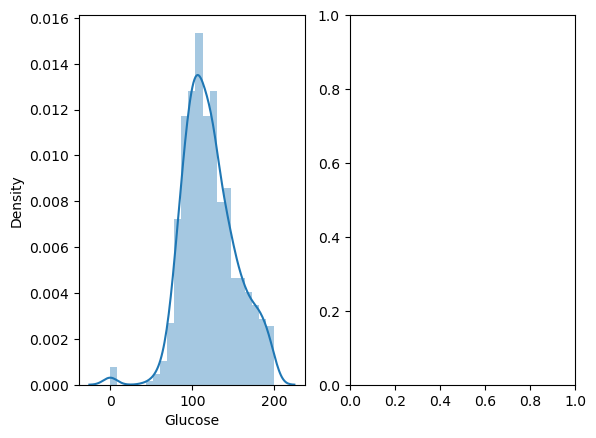

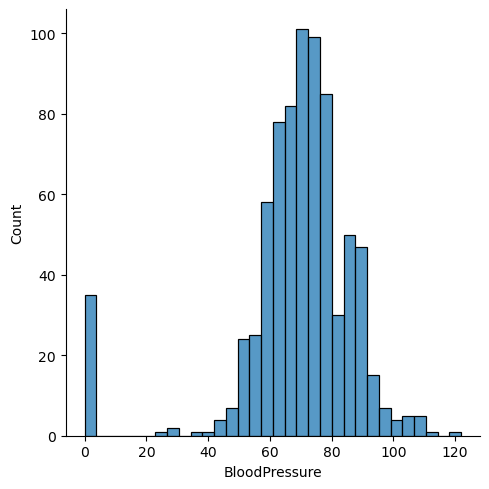

In [16]:
plt.subplot(121),sn.distplot(df['Glucose'])
plt.subplot(122),sn.displot(df['BloodPressure'])

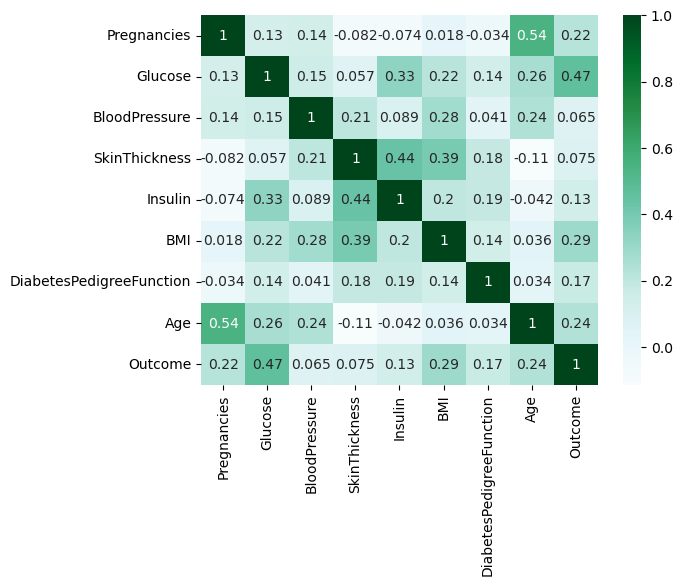

In [17]:
p=sn.heatmap(df.corr(),annot=True,cmap='BuGn')

In [18]:
sc=StandardScaler()

In [19]:
x=pd.DataFrame(sc.fit_transform(df_copy.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [20]:
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-3.351824e-02,6.655021e-01,-3.345079e-16,1.662917e-01,0.468492,1.425995
1,-0.844885,-1.206162,-5.298590e-01,-1.746338e-02,-3.345079e-16,-8.525312e-01,-0.365061,-0.190672
2,1.233880,2.015813,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833e+00,0.604397,-0.105584
3,-0.844885,-1.074652,-5.298590e-01,-7.004289e-01,-7.243887e-01,-6.342120e-01,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980e+00,5.484909,-0.020496
5,0.342981,-0.186965,1.319287e-01,8.087936e-16,-3.345079e-16,-9.980773e-01,-0.818079,-0.275760
6,-0.250952,-1.436303,-1.853434e+00,3.240194e-01,-7.950054e-01,-2.121282e-01,-0.676133,-0.616111
7,1.827813,-0.219843,1.175571e-15,8.087936e-16,-3.345079e-16,4.137202e-01,-1.020427,-0.360847
8,-0.547919,2.476096,-1.989652e-01,1.803778e+00,4.560094e+00,-2.849013e-01,-0.947944,1.681259
9,1.233880,0.108930,1.951845e+00,8.087936e-16,-3.345079e-16,-3.102502e-15,-0.724455,1.766346


In [21]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,8.651081e-01,-3.351824e-02,6.655021e-01,-3.345079e-16,1.662917e-01,0.468492,1.425995
1,-0.844885,-1.206162e+00,-5.298590e-01,-1.746338e-02,-3.345079e-16,-8.525312e-01,-0.365061,-0.190672
2,1.233880,2.015813e+00,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833e+00,0.604397,-0.105584
3,-0.844885,-1.074652e+00,-5.298590e-01,-7.004289e-01,-7.243887e-01,-6.342120e-01,-0.920763,-1.041549
4,-1.141852,5.034578e-01,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980e+00,5.484909,-0.020496
5,0.342981,-1.869654e-01,1.319287e-01,8.087936e-16,-3.345079e-16,-9.980773e-01,-0.818079,-0.275760
6,-0.250952,-1.436303e+00,-1.853434e+00,3.240194e-01,-7.950054e-01,-2.121282e-01,-0.676133,-0.616111
7,1.827813,-2.198427e-01,1.175571e-15,8.087936e-16,-3.345079e-16,4.137202e-01,-1.020427,-0.360847
8,-0.547919,2.476096e+00,-1.989652e-01,1.803778e+00,4.560094e+00,-2.849013e-01,-0.947944,1.681259
9,1.233880,1.089303e-01,1.951845e+00,8.087936e-16,-3.345079e-16,-3.102502e-15,-0.724455,1.766346


In [22]:
y=df['Outcome']

In [23]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     0
42     0
43     1
44     0
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     1
62     0
63     0
64     1
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
110    1
1

In [24]:
x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=75,test_size=0.25)

In [25]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (576, 8)
shape of x_test (576,)
shape of y_train (192, 8)
shape of y_test (192,)


In [26]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
192,0.936914,1.226758e+00,-5.298590e-01,8.087936e-16,-3.345079e-16,-2.994559e-01,-0.268417,0.234767
139,0.342981,-5.486156e-01,-3.351824e-02,-1.746338e-02,1.994354e+00,6.465940e-01,-0.944924,-0.445935
539,-0.250952,2.404395e-01,1.620951e+00,2.259088e+00,-6.452287e-03,5.738209e-01,1.498352,-0.105584
725,0.046014,-3.184746e-01,4.628226e-01,1.234640e+00,-3.345079e-16,1.010459e+00,-0.712374,0.404942
548,-0.844885,1.391145e+00,7.937164e-01,1.576123e+00,-1.042164e+00,4.985484e-02,-0.395262,1.425995
271,-0.547919,-4.499837e-01,-8.607529e-01,3.240194e-01,-1.171628e+00,-1.056296e+00,-1.038547,-1.041549
464,1.827813,-2.198427e-01,2.117292e+00,8.087936e-16,-3.345079e-16,-1.230951e+00,1.661439,0.064591
704,0.046014,-3.842292e-01,2.973756e-01,-1.041912e+00,-6.537720e-01,-5.905481e-01,-1.068748,-0.531023
754,1.233880,1.062372e+00,4.628226e-01,3.240194e-01,-3.345079e-16,-8.363615e-03,-0.087210,1.000557
228,0.046014,2.476096e+00,-1.989652e-01,1.120812e+00,6.925754e+00,6.174847e-01,5.608734,-0.190672


In [27]:
x_test

192    1
139    0
539    1
725    0
548    0
271    0
464    0
704    0
754    1
228    0
650    0
619    1
692    0
297    0
32     0
55     0
626    0
625    0
511    0
300    1
242    1
496    0
147    0
608    0
138    0
637    0
745    0
209    1
505    0
411    0
659    1
642    1
662    1
0      1
454    0
473    0
296    1
431    0
118    0
582    0
62     0
751    0
604    1
407    0
716    1
497    0
680    0
152    1
395    0
80     0
707    0
140    0
388    1
694    0
375    1
301    1
713    0
657    0
328    1
56     1
250    0
458    1
2      1
423    0
419    1
61     1
749    1
493    1
100    1
584    1
348    0
658    0
87     0
764    0
421    0
285    0
651    0
632    0
378    1
279    0
456    0
735    0
598    1
442    0
148    0
578    0
172    0
170    1
519    0
251    0
121    0
675    1
101    0
434    0
247    0
225    0
678    1
602    0
425    1
28     0
461    0
310    0
415    1
557    0
467    0
46     0
455    1
390    0
709    1
719    1
232    0
6

In [28]:
y_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
667,1.827813,-3.513519e-01,-1.989652e-01,-2.451185e-01,-3.345079e-16,-0.721540,-0.999286,0.575118
600,-0.844885,-4.499837e-01,1.290057e+00,-1.155739e+00,-3.345079e-16,-0.779758,-0.217075,-0.786286
14,0.342981,1.456899e+00,-3.351824e-02,-1.155739e+00,2.289367e-01,-0.968968,0.347687,1.511083
205,0.342981,-3.513519e-01,-3.351824e-02,-1.312910e-01,-3.345079e-16,-1.245506,-0.195934,-0.531023
197,-0.250952,-4.828610e-01,-8.607529e-01,-1.838705e+00,-1.265783e+00,-1.391052,0.622518,-0.871374
755,-0.844885,2.075622e-01,1.290057e+00,1.120812e+00,-5.360775e-01,0.588376,1.767143,0.319855
284,-0.547919,-4.499837e-01,6.282695e-01,8.087936e-16,-3.345079e-16,-0.794313,-0.642912,1.596171
124,-1.141852,-2.855973e-01,2.973756e-01,8.087936e-16,-3.345079e-16,0.122628,-0.585529,-0.871374
484,-1.141852,7.664762e-01,1.175571e-15,8.087936e-16,-3.345079e-16,1.709081,0.477552,-0.190672
387,1.233880,-5.486156e-01,2.282739e+00,7.793297e-01,-3.345079e-16,1.578089,-0.703314,1.000557


In [30]:
model=LogisticRegression()

In [31]:
model.fit(x,y)

LogisticRegression()

In [35]:
model.predict(x_train)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [39]:
model.score(x,y)

0.7760416666666666